#### Problem Statement

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 
They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


#### Loading Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,RandomizedSearchCV
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import pickle
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [2]:
df = pd.read_csv("Data.csv")
df.head(5)

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

#### Its a classification problem and I need to predict label

#### Checking for null values

In [3]:
pd.set_option('display.max_rows',None)
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

#### Dataset doesn't have any null values

#### Setting Unnamed: 0 as index

In [4]:
df = df.set_index('Unnamed: 0')
df.head(3)

label       msisdn    aon  daily_decr30  daily_decr90  rental30  \
Unnamed: 0                                                                    
1               0  21408I70789  272.0       3055.05       3065.15    220.13   
2               1  76462I70374  712.0      12122.00      12124.75   3691.26   
3               1  17943I70372  535.0       1398.00       1398.00    900.13   

            rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
Unnamed: 0                                                                     
1             260.13                2.0                0.0              1539   
2            3691.26               20.0                0.0              5787   
3             900.13                3.0                0.0              1539   

            ...  maxamnt_loans30  medianamnt_loans30  cnt_loans90  \
Unnamed: 0  ...                                                     
1           ...              6.0                 0.0          2.0   
2           ...             12.0                 0.0          1.0   
3           ...              6.0                 0.0          1.0   

            amnt_loans90  maxamnt_loans90  medianamnt_loans90  payback30  \
Unnamed: 0                                                                 
1                     12                6                 0.0       29.0   
2                     12               12                 0.0        0.0   
3                      6                6                 0.0        0.0   

            payback90  pcircle       pdate  
Unnamed: 0                                  
1                29.0      UPW  2016-07-20  
2                 0.0      UPW  2016-08-10  
3                 0.0      UPW  2016-08-19  

[3 rows x 36 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

#### Converting pdate to datetime format and extracting day, month and year

In [6]:
df['pdate']=pd.to_datetime(df['pdate'])

In [7]:
df['Day'] = df['pdate'].dt.day
df['Month'] = df['pdate'].dt.month
df['Year'] = df['pdate'].dt.year
df = df.drop('pdate',axis=1)
df.head(3)

label       msisdn    aon  daily_decr30  daily_decr90  rental30  \
Unnamed: 0                                                                    
1               0  21408I70789  272.0       3055.05       3065.15    220.13   
2               1  76462I70374  712.0      12122.00      12124.75   3691.26   
3               1  17943I70372  535.0       1398.00       1398.00    900.13   

            rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
Unnamed: 0                                                                     
1             260.13                2.0                0.0              1539   
2            3691.26               20.0                0.0              5787   
3             900.13                3.0                0.0              1539   

            ...  cnt_loans90  amnt_loans90  maxamnt_loans90  \
Unnamed: 0  ...                                               
1           ...          2.0            12                6   
2           ...          1.0            12               12   
3           ...          1.0             6                6   

            medianamnt_loans90  payback30  payback90  pcircle  Day  Month  \
Unnamed: 0                                                                  
1                          0.0       29.0       29.0      UPW   20      7   
2                          0.0        0.0        0.0      UPW   10      8   
3                          0.0        0.0        0.0      UPW   19      8   

            Year  
Unnamed: 0        
1           2016  
2           2016  
3           2016  

[3 rows x 38 columns]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209593 entries, 1 to 209593
Data columns (total 38 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

#### Converting pcircle and msisdn by encoding techniques

In [9]:
catcolumns = [column for column in df.columns if df[column].dtype=='object']
numcolumns = df.drop(columns=['msisdn','pcircle'],axis=1)
print("------------------- Categorical Columns------------------------------")
categorical = df[catcolumns]
print(categorical.head(2))
print("--------------------Numerical Columns---------------------------------")
print(numcolumns.head(2))

------------------- Categorical Columns------------------------------
                 msisdn pcircle
Unnamed: 0                     
1           21408I70789     UPW
2           76462I70374     UPW
--------------------Numerical Columns---------------------------------
            label    aon  daily_decr30  daily_decr90  rental30  rental90  \
Unnamed: 0                                                                 
1               0  272.0       3055.05       3065.15    220.13    260.13   
2               1  712.0      12122.00      12124.75   3691.26   3691.26   

            last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
Unnamed: 0                                                           
1                         2.0                0.0              1539   
2                        20.0                0.0              5787   

            cnt_ma_rech30  ...  medianamnt_loans30  cnt_loans90  amnt_loans90  \
Unnamed: 0                 ...                                  

#### Applying LabelEncoding for categorical columns

In [10]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
for i in ['msisdn','pcircle']:
    categorical[i]=lab_enc.fit_transform(categorical[i])

In [11]:
df = pd.concat([categorical,numcolumns],axis=1)
df.head(3)

msisdn  pcircle  label    aon  daily_decr30  daily_decr90  \
Unnamed: 0                                                              
1            40191        0      0  272.0       3055.05       3065.15   
2           142291        0      1  712.0      12122.00      12124.75   
3            33594        0      1  535.0       1398.00       1398.00   

            rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
Unnamed: 0                                                            ...   
1             220.13    260.13                2.0                0.0  ...   
2            3691.26   3691.26               20.0                0.0  ...   
3             900.13    900.13                3.0                0.0  ...   

            medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
Unnamed: 0                                                                   
1                          0.0          2.0            12                6   
2                          0.0          1.0            12               12   
3                          0.0          1.0             6                6   

            medianamnt_loans90  payback30  payback90  Day  Month  Year  
Unnamed: 0                                                              
1                          0.0       29.0       29.0   20      7  2016  
2                          0.0        0.0        0.0   10      8  2016  
3                          0.0        0.0        0.0   19      8  2016  

[3 rows x 38 columns]

#### Checking the shape

In [12]:
df.shape

(209593, 38)

#### Dropping pcircle as all the rows are having same value

In [13]:
df = df.drop(columns=['pcircle'],axis=1)
print(df.shape)
df.head(3)

(209593, 37)


msisdn  label    aon  daily_decr30  daily_decr90  rental30  \
Unnamed: 0                                                               
1            40191      0  272.0       3055.05       3065.15    220.13   
2           142291      1  712.0      12122.00      12124.75   3691.26   
3            33594      1  535.0       1398.00       1398.00    900.13   

            rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
Unnamed: 0                                                                     
1             260.13                2.0                0.0              1539   
2            3691.26               20.0                0.0              5787   
3             900.13                3.0                0.0              1539   

            ...  medianamnt_loans30  cnt_loans90  amnt_loans90  \
Unnamed: 0  ...                                                  
1           ...                 0.0          2.0            12   
2           ...                 0.0          1.0            12   
3           ...                 0.0          1.0             6   

            maxamnt_loans90  medianamnt_loans90  payback30  payback90  Day  \
Unnamed: 0                                                                   
1                         6                 0.0       29.0       29.0   20   
2                        12                 0.0        0.0        0.0   10   
3                         6                 0.0        0.0        0.0   19   

            Month  Year  
Unnamed: 0               
1               7  2016  
2               8  2016  
3               8  2016  

[3 rows x 37 columns]

#### EDA

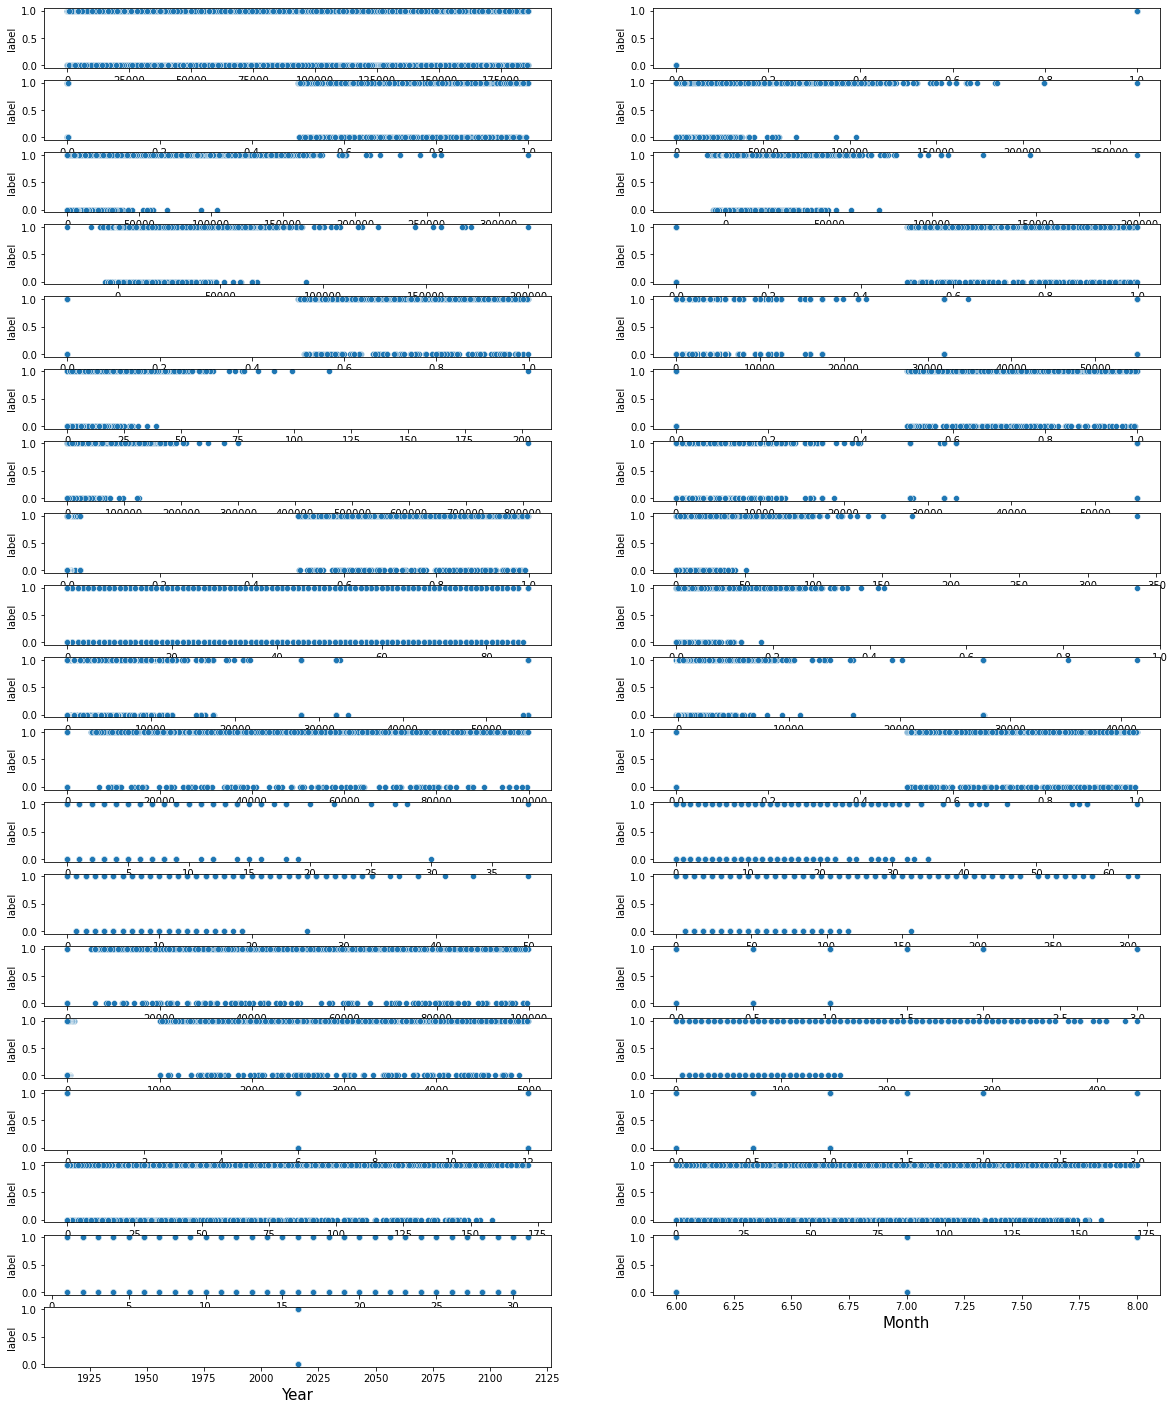

In [25]:
plt.figure(figsize=(20,25))
gr = 1
for column in df:
    if gr<=38:
        ax = plt.subplot(19,2,gr)
        sns.scatterplot(x = df[column],y=df['label'],data=df)
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Checking the correlation

In [14]:
df.corr()

msisdn     label       aon  daily_decr30  \
msisdn                1.000000  0.001976  0.000566      0.000717   
label                 0.001976  1.000000 -0.003785      0.168298   
aon                   0.000566 -0.003785  1.000000      0.001104   
daily_decr30          0.000717  0.168298  0.001104      1.000000   
daily_decr90          0.000950  0.166150  0.000374      0.977704   
rental30             -0.001404  0.058085 -0.000960      0.442066   
rental90             -0.000691  0.075521 -0.000790      0.458977   
last_rech_date_ma    -0.000928  0.003728  0.001692      0.000487   
last_rech_date_da     0.001400  0.001711 -0.001693     -0.001636   
last_rech_amt_ma     -0.002368  0.131804  0.004256      0.275837   
cnt_ma_rech30         0.000617  0.237331 -0.003148      0.451385   
fr_ma_rech30         -0.001804  0.001330 -0.001163     -0.000577   
sumamnt_ma_rech30     0.001094  0.202828  0.000707      0.636536   
medianamnt_ma_rech30  0.000668  0.141490  0.004306      0.295356   
medianmarechprebal30 -0.000238 -0.004829  0.003930     -0.001153   
cnt_ma_rech90        -0.001859  0.236392 -0.002725      0.587338   
fr_ma_rech90         -0.004413  0.084385  0.004401     -0.078299   
sumamnt_ma_rech90    -0.000936  0.205793  0.001011      0.762981   
medianamnt_ma_rech90 -0.000625  0.120855  0.004909      0.257847   
medianmarechprebal90 -0.000615  0.039300 -0.000859      0.037495   
cnt_da_rech30        -0.001720  0.003827  0.001564      0.000700   
fr_da_rech30         -0.000241 -0.000027  0.000892     -0.001499   
cnt_da_rech90         0.004595  0.002999  0.001121      0.038814   
fr_da_rech90         -0.002233 -0.005418  0.005395      0.020673   
cnt_loans30           0.001765  0.196283 -0.001826      0.366116   
amnt_loans30          0.002170  0.197272 -0.001726      0.471492   
maxamnt_loans30      -0.000755  0.000248 -0.002764     -0.000028   
medianamnt_loans30    0.000986  0.044589  0.004664     -0.011610   
cnt_loans90           0.001859  0.004733 -0.000611      0.008962   
amnt_loans90         -0.000155  0.199788 -0.002319      0.563496   
maxamnt_loans90       0.003286  0.084144 -0.001191      0.400199   
medianamnt_loans90    0.001210  0.035747  0.002771     -0.037305   
payback30             0.002922  0.048336  0.001940      0.026915   
payback90             0.002671  0.049183  0.002203      0.047175   
Day                   0.002466  0.006825  0.000662      0.006477   
Month                -0.002986  0.154949 -0.001863      0.518664   
Year                       NaN       NaN       NaN           NaN   

                      daily_decr90  rental30  rental90  last_rech_date_ma  \
msisdn                    0.000950 -0.001404 -0.000691          -0.000928   
label                     0.166150  0.058085  0.075521           0.003728   
aon                       0.000374 -0.000960 -0.000790           0.001692   
daily_decr30              0.977704  0.442066  0.458977           0.000487   
daily_decr90              1.000000  0.434685  0.471730           0.000908   
rental30                  0.434685  1.000000  0.955237          -0.001095   
rental90                  0.471730  0.955237  1.000000          -0.001688   
last_rech_date_ma         0.000908 -0.001095 -0.001688           1.000000   
last_rech_date_da        -0.001886  0.003261  0.002794           0.001790   
last_rech_amt_ma          0.264131  0.127271  0.121416          -0.000147   
cnt_ma_rech30             0.426707  0.233343  0.230260           0.004311   
fr_ma_rech30             -0.000343 -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30         0.603886  0.272649  0.259709           0.002105   
medianamnt_ma_rech30      0.282960  0.129853  0.120242          -0.001358   
medianmarechprebal30     -0.000746 -0.001415 -0.001237           0.004071   
cnt_ma_rech90             0.593069  0.312118  0.345293           0.004263   
fr_ma_rech90             -0.079530 -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90         0.768817  0.342306  0.36060

In [32]:
correlation = df.corr()
correlation['label'].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
Month                   0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
Day                     0.006825
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
msisdn                  0.001976
last_rech_date_da       0.001711
fr_ma_rech

##### plotting heatmap

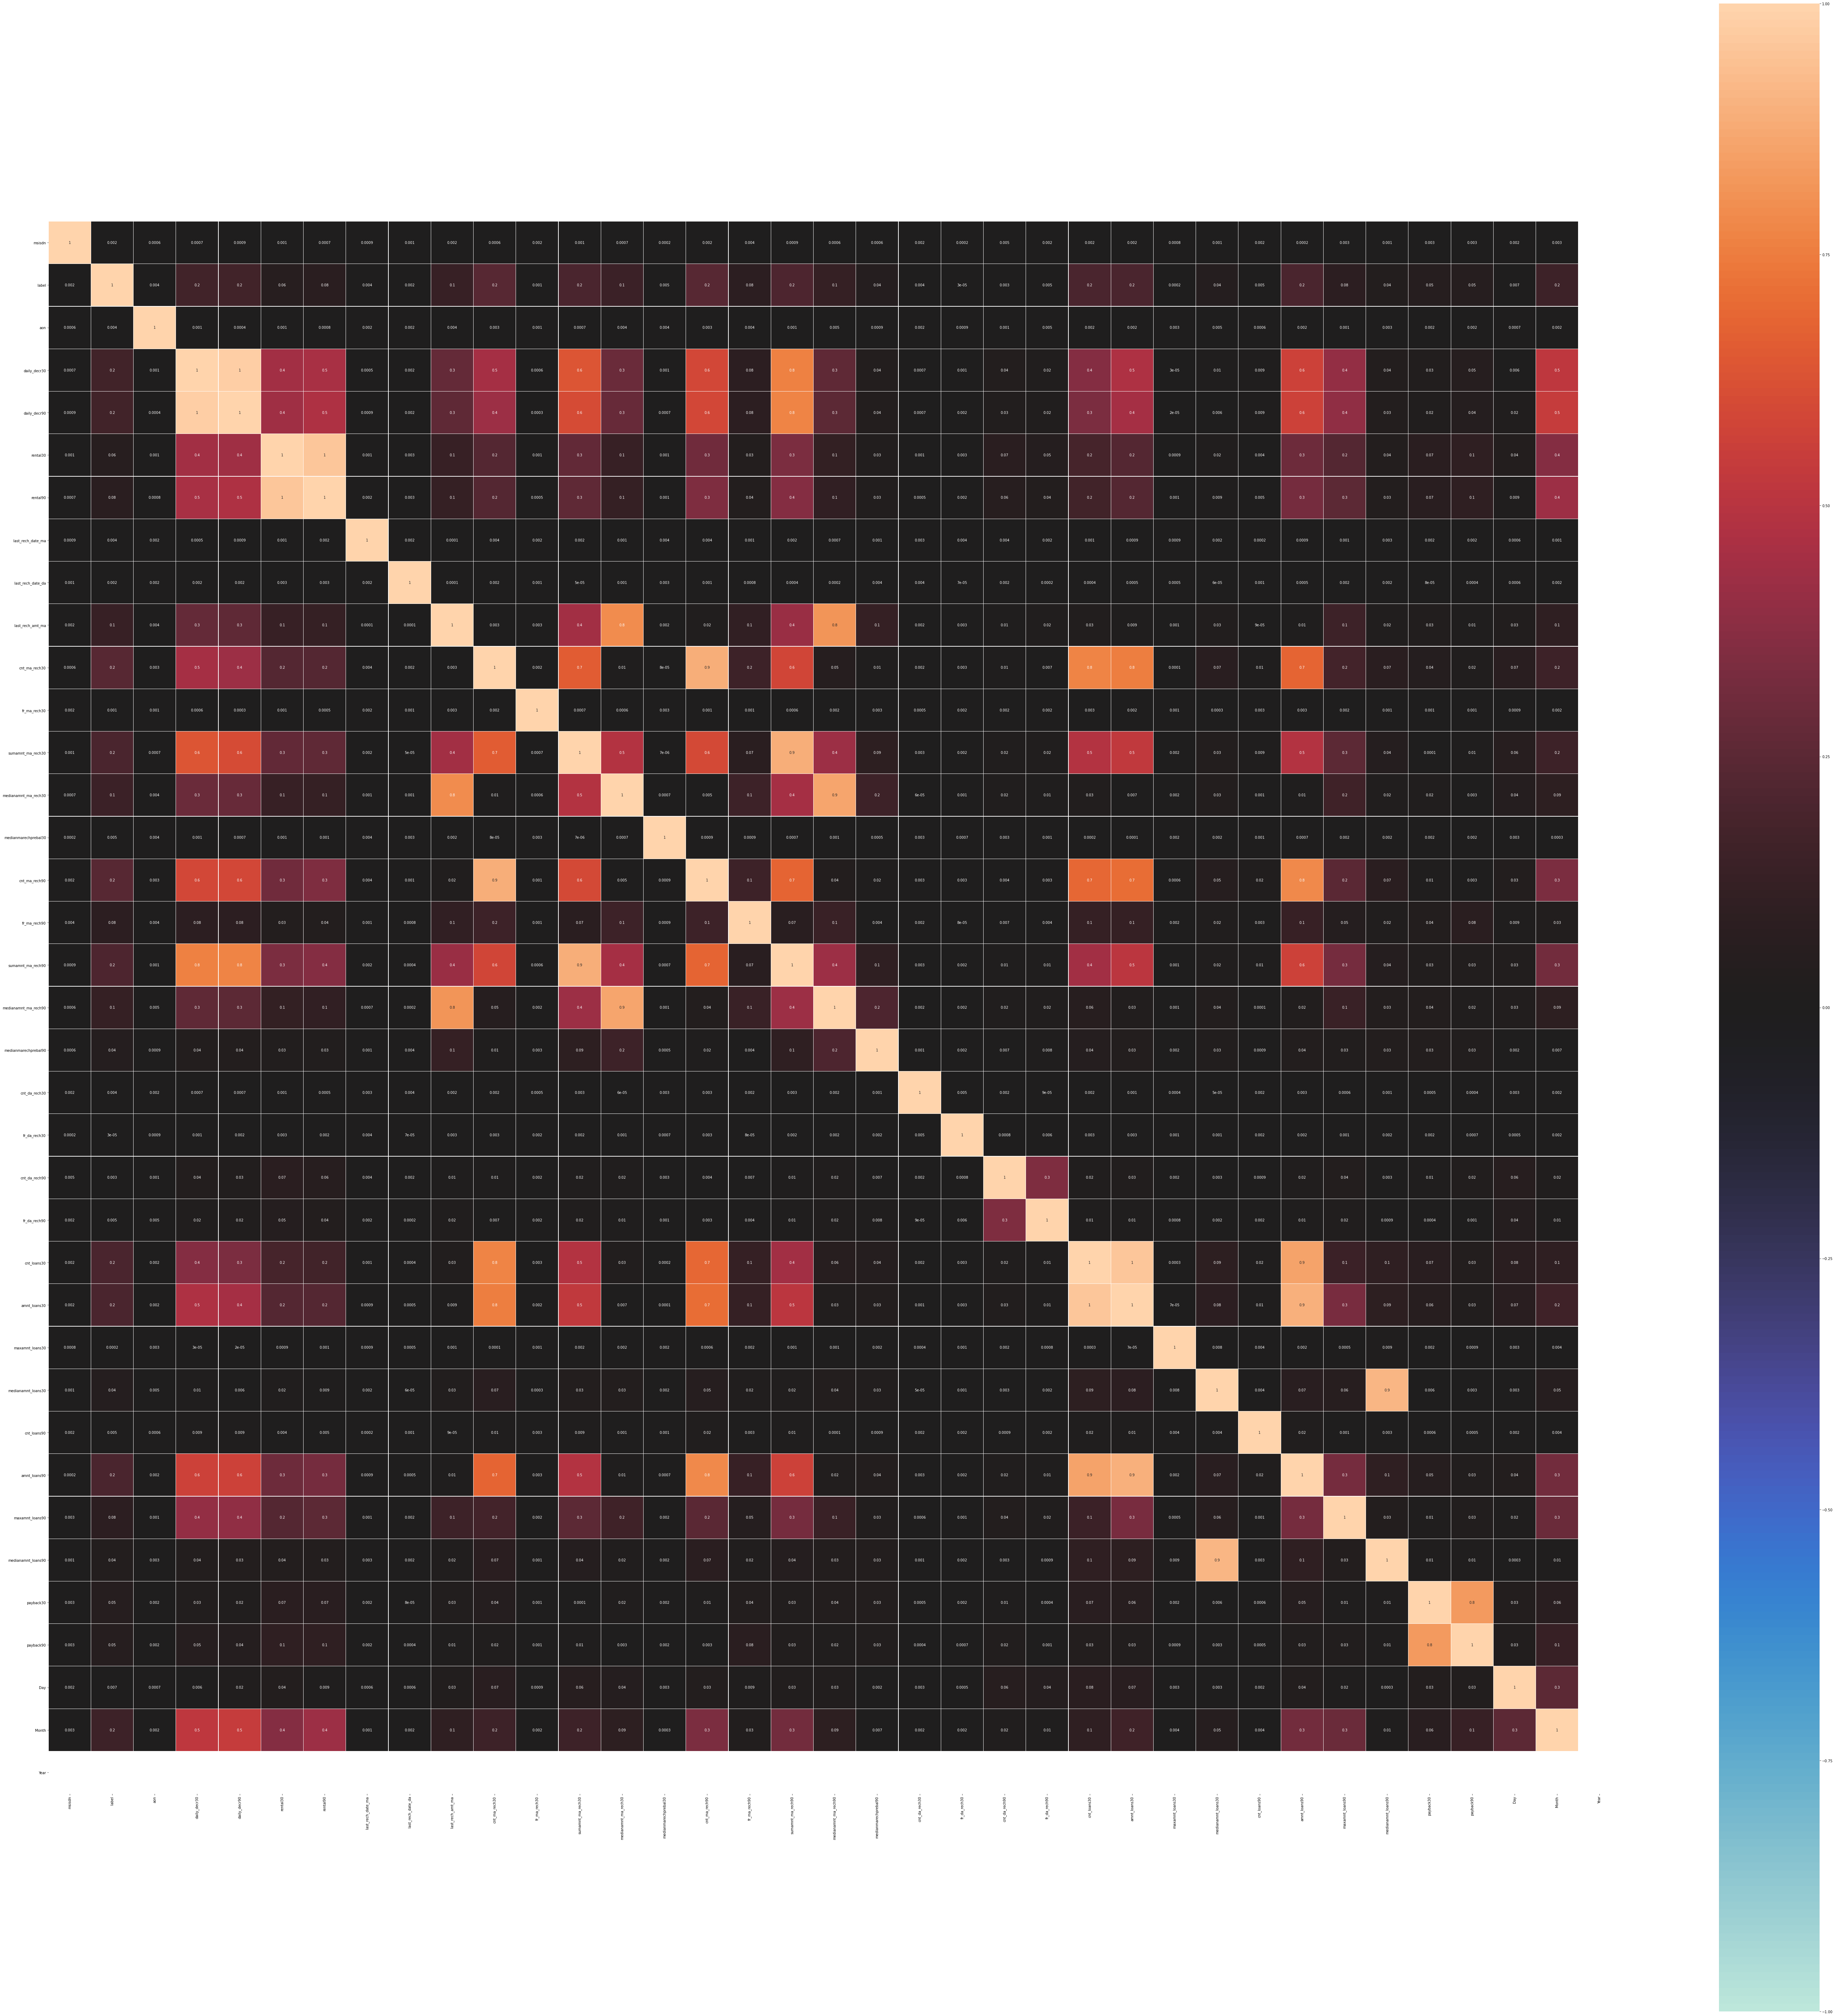

In [27]:
df_corr = df.corr().abs()
plt.figure(figsize=(80,80))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square = True,center=0,fmt='.1g',linewidth=.2)
plt.tight_layout()

#### Multicollinearity exists in the dataset

#### Year doesn't have any correlation with the target variable

#### Statistical Analysis of the data

In [28]:
df.describe()

msisdn          label            aon   daily_decr30  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean    93100.650179       0.875177    8112.343445    5381.402289   
std     53758.461427       0.330519   75696.082531    9220.623400   
min         0.000000       0.000000     -48.000000     -93.012667   
25%     46506.000000       1.000000     246.000000      42.440000   
50%     93073.000000       1.000000     527.000000    1469.175667   
75%    139626.000000       1.000000     982.000000    7244.000000   
max    186242.000000       1.000000  999860.755168  265926.000000   

        daily_decr90       rental30       rental90  last_rech_date_ma  \
count  209593.000000  209593.000000  209593.000000      209593.000000   
mean     6082.515068    2692.581910    3483.406534        3755.847800   
std     10918.812767    4308.586781    5770.461279       53905.892230   
min       -93.012667  -23737.140000  -24720.580000         -29.000000   
25%        42.692000     280.420000     300.260000           1.000000   
50%      1500.000000    1083.570000    1334.000000           3.000000   
75%      7802.790000    3356.940000    4201.790000           7.000000   
max    320630.000000  198926.110000  200148.110000      998650.377733   

       last_rech_date_da  last_rech_amt_ma  ...  medianamnt_loans30  \
count      209593.000000     209593.000000  ...       209593.000000   
mean         3712.202921       2064.452797  ...            0.054029   
std         53374.833430       2370.786034  ...            0.218039   
min           -29.000000          0.000000  ...            0.000000   
25%             0.000000        770.000000  ...            0.000000   
50%             0.000000       1539.000000  ...            0.000000   
75%             0.000000       2309.000000  ...            0.000000   
max        999171.809410      55000.000000  ...            3.000000   

         cnt_loans90   amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
count  209593.000000  209593.000000    209593.000000       209593.000000   
mean       18.520919      23.645398         6.703134            0.046077   
std       224.797423      26.469861         2.103864            0.200692   
min         0.000000       0.000000         0.000000            0.000000   
25%         1.000000       6.000000         6.000000            0.000000   
50%         2.000000      12.000000         6.000000            0.000000   
75%         5.000000      30.000000         6.000000            0.000000   
max      4997.517944     438.000000        12.000000            3.000000   

           payback30      payback90           Day          Month      Year  
count  209593.000000  209593.000000  209593.00000  209593.000000  209593.0  
mean        3.398826       4.321485      14.39894       6.797321    2016.0  
std         8.813729      10.308108       8.43890       0.741435       0.0  
min         0.000000       0.000000       1.00000       6.000000    2016.0  
25%         0.000000       0.000000       7.00000       6.000000    2016.0  
50%         0.000000       1.666667      14.00000       7.000000    2016.0  
75%         3.750000       4.500000      21.00000       7.000000    2016.0  
max       171.500000     171.500000      31.00000       8.000000    2016.0  

[8 rows x 37 columns]

#### Outliers exists in the dataset

#### Visualizing it graphically

In [20]:
df1 = df.iloc[:,0:11]
df2 = df.iloc[:,11:22]
df3 = df.iloc[:,22:38]

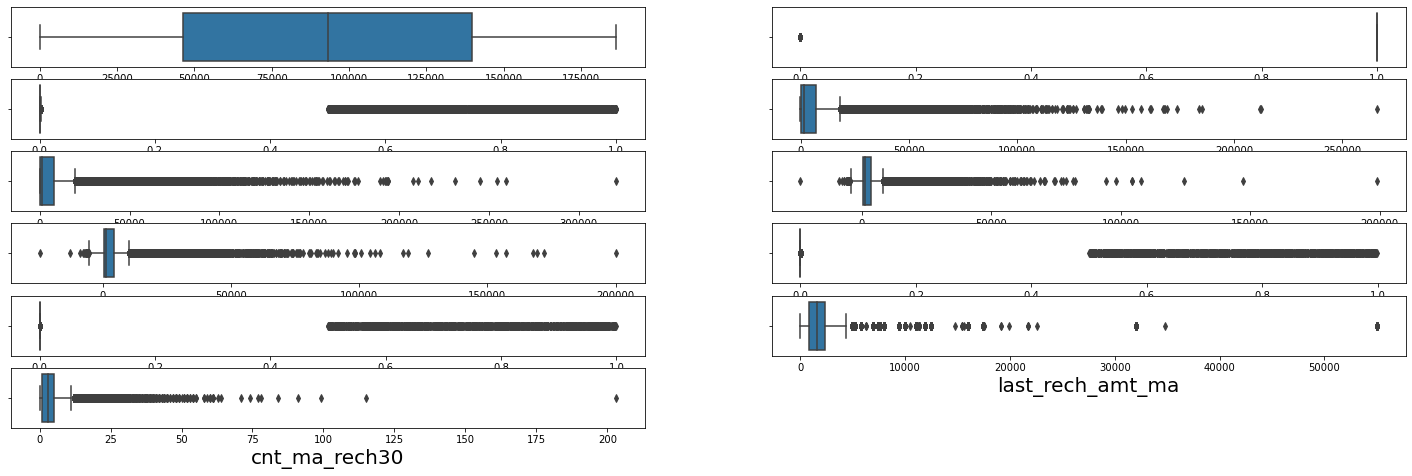

In [27]:
plt.figure(figsize=(25,25))
gr = 1
for column in df1:
    if gr<=11:
        ax = plt.subplot(19,2,gr)
        sns.boxplot(df1[column],orient='v')
        plt.xlabel(column,fontsize=20)
    gr+=1
plt.show()

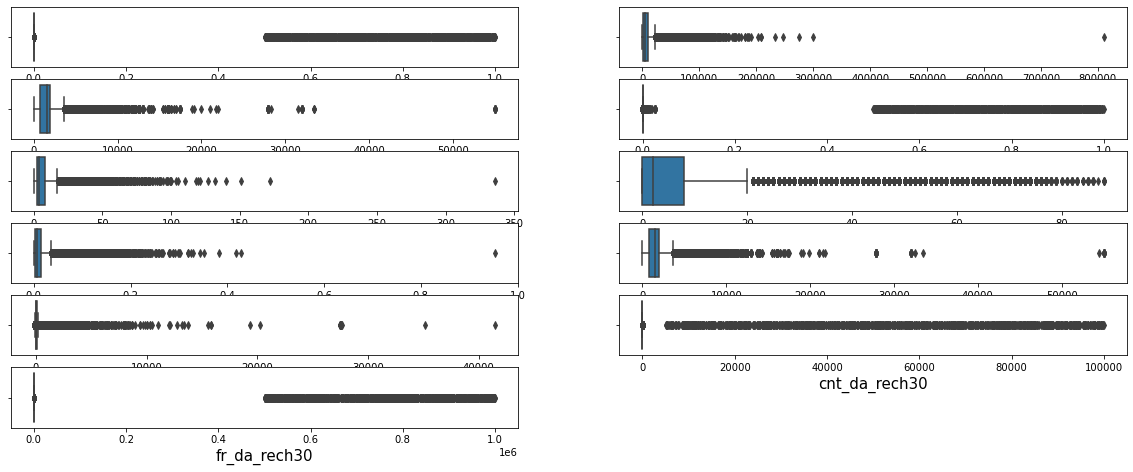

In [29]:
plt.figure(figsize=(20,25))
gr = 1
for column in df2:
    if gr<=38:
        ax = plt.subplot(19,2,gr)
        sns.boxplot(df2[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

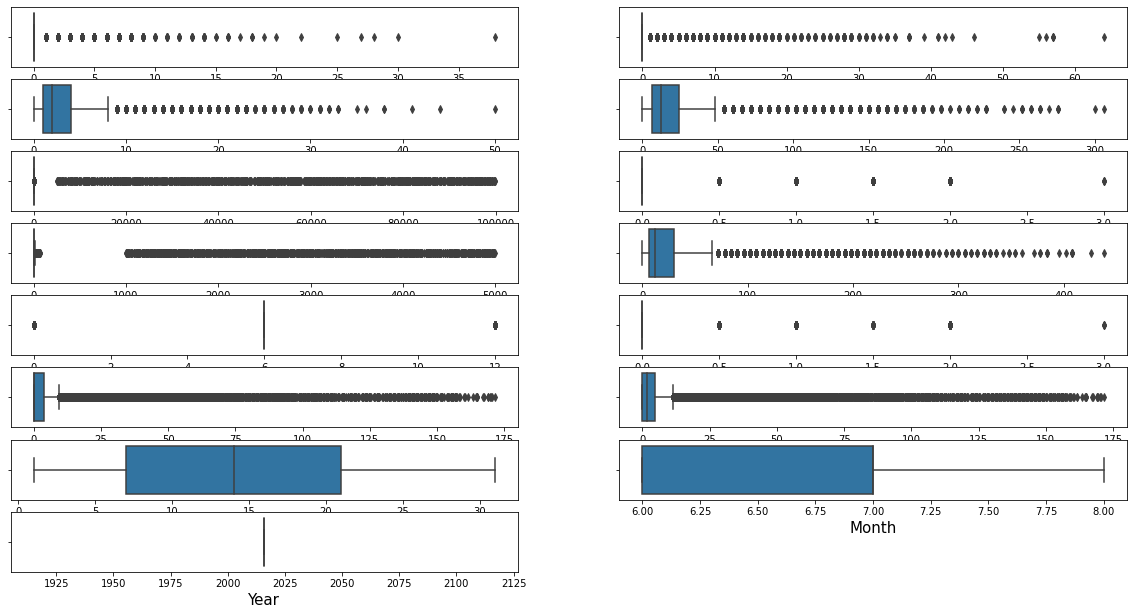

In [30]:
plt.figure(figsize=(20,25))
gr = 1
for column in df3:
    if gr<=38:
        ax = plt.subplot(19,2,gr)
        sns.boxplot(df3[column],orient='v')
        plt.xlabel(column,fontsize=15)
    gr+=1
plt.show()

#### Non realistic values  exists in the dataset

#### Checking skewness

In [30]:
df.skew()

msisdn                   0.000719
label                   -2.270254
aon                     10.392949
daily_decr30             3.946230
daily_decr90             4.252565
rental30                 4.521929
rental90                 4.437681
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779875
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    44.880503
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90  

#### Dataset is highly skewed

#### Data Cleaning

In [14]:
df = df.drop(columns=['Day','cnt_loans90','cnt_da_rech30','cnt_da_rech90','msisdn','last_rech_date_ma','maxamnt_loans30','fr_da_rech30','medianmarechprebal30','fr_da_rech90','aon','last_rech_date_da','Year','fr_ma_rech30','cnt_ma_rech30'],axis=1)
df.head(2)

label  daily_decr30  daily_decr90  rental30  rental90  \
Unnamed: 0                                                          
1               0       3055.05       3065.15    220.13    260.13   
2               1      12122.00      12124.75   3691.26   3691.26   

            last_rech_amt_ma  sumamnt_ma_rech30  medianamnt_ma_rech30  \
Unnamed: 0                                                              
1                       1539             3078.0                1539.0   
2                       5787             5787.0                5787.0   

            cnt_ma_rech90  fr_ma_rech90  ...  medianmarechprebal90  \
Unnamed: 0                               ...                         
1                       2            21  ...                  7.50   
2                       1             0  ...                 61.04   

            cnt_loans30  amnt_loans30  medianamnt_loans30  amnt_loans90  \
Unnamed: 0                                                                
1                     2            12                 0.0            12   
2                     1            12                 0.0            12   

            maxamnt_loans90  medianamnt_loans90  payback30  payback90  Month  
Unnamed: 0                                                                    
1                         6                 0.0       29.0       29.0      7  
2                        12                 0.0        0.0        0.0      8  

[2 rows x 22 columns]

In [15]:
df = df.drop(columns=['payback90','payback30','medianamnt_loans30','medianmarechprebal90','medianamnt_loans90'],axis=1)
df.head(2)

label  daily_decr30  daily_decr90  rental30  rental90  \
Unnamed: 0                                                          
1               0       3055.05       3065.15    220.13    260.13   
2               1      12122.00      12124.75   3691.26   3691.26   

            last_rech_amt_ma  sumamnt_ma_rech30  medianamnt_ma_rech30  \
Unnamed: 0                                                              
1                       1539             3078.0                1539.0   
2                       5787             5787.0                5787.0   

            cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
Unnamed: 0                                                   
1                       2            21               3078   
2                       1             0               5787   

            medianamnt_ma_rech90  cnt_loans30  amnt_loans30  amnt_loans90  \
Unnamed: 0                                                                  
1                         1539.0            2            12            12   
2                         5787.0            1            12            12   

            maxamnt_loans90  Month  
Unnamed: 0                          
1                         6      7  
2                        12      8

In [16]:
df.shape

(209593, 17)

#### Visualizing class imbalance

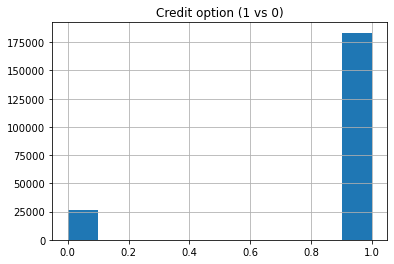

In [17]:
df['label'].hist(grid=True)
plt.title("Credit option (1 vs 0)")
plt.show()

#### removing outliers

In [18]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print("Old shape : ",z.shape)
print("---------------------------------------------------------")
print(z)
print("----------------------------------------------------------")
print("Row numbers : ",np.where(z>3)[0])
print("Column numbers : ",np.where(z>3)[0])
index = np.where(z>3)[0]
df1 = df.drop(df.index[index])
print("-----------------------------------------------------------")
print("New shape : ",df1.shape)

Old shape :  (209593, 17)
---------------------------------------------------------
[[2.64789583 0.25229941 0.27634619 ... 0.43995041 0.33421157 0.27336037]
 [0.37765836 0.73103667 0.5533797  ... 0.43995041 2.51768994 1.62209905]
 [0.37765836 0.43201111 0.42903256 ... 0.66662385 0.33421157 1.62209905]
 ...
 [0.37765836 0.70079045 0.53319431 ... 1.14676363 2.51768994 0.27336037]
 [0.37765836 0.77075515 0.59455827 ... 0.01339646 2.51768994 0.27336037]
 [0.37765836 0.09674426 0.14174607 ... 0.21327698 2.51768994 0.27336037]]
----------------------------------------------------------
Row numbers :  [    21     22     36 ... 209580 209581 209586]
Column numbers :  [    21     22     36 ... 209580 209581 209586]
-----------------------------------------------------------
New shape :  (182573, 17)


In [20]:
loss = (209593-182573)/209593*100
print("While removing outliers we loss ",loss,"% of data")

While removing outliers we loss  12.891651915855967 % of data


#### data loss is higher, so keeping outliers as it is

#### Splitting the dataset into target variable and feature variables

In [17]:
x = df.drop('label',axis=1)
y = df['label']

#### Removing skewness

In [18]:
from sklearn.preprocessing import power_transform
x_new = power_transform(x,method='yeo-johnson')
x_new

array([[ 0.33215599,  0.29918139, -0.5807859 , ..., -0.25085016,
        -0.28561065,  0.39752189],
       [ 1.11602076,  1.04508395,  0.33973618, ..., -0.25085016,
         2.32582829,  1.48013263],
       [-0.00750824, -0.02820272, -0.36696459, ..., -1.00571394,
        -0.28561065,  1.48013263],
       ...,
       [ 1.10045476,  1.03342361,  0.82540037, ...,  1.35845482,
         2.32582829,  0.39752189],
       [ 1.13605674,  1.06838077, -0.51560714, ...,  0.50373963,
         2.32582829,  0.39752189],
       [ 0.52502127,  0.48715657, -0.49243345, ...,  0.19226023,
         2.32582829,  0.39752189]])

In [19]:
x_new = pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

daily_decr30           -6.582717
daily_decr90           -7.080193
rental30               -1.022844
rental90               -0.962717
last_rech_amt_ma       -0.061262
sumamnt_ma_rech30      -0.291322
medianamnt_ma_rech30   -0.189628
cnt_ma_rech90          -0.002465
fr_ma_rech90            0.142952
sumamnt_ma_rech90      -0.192158
medianamnt_ma_rech90   -0.044604
cnt_loans30             0.036243
amnt_loans30            0.001948
amnt_loans90           -0.008988
maxamnt_loans90         0.364282
Month                   0.076431
dtype: float64

#### Still skewness exists in the dataset

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [21]:
y_over.value_counts()

1    183431
0    183431
Name: label, dtype: int64

#### Scaling the dataset

In [22]:
scale = StandardScaler()
X_scaled = scale.fit_transform(x_over)

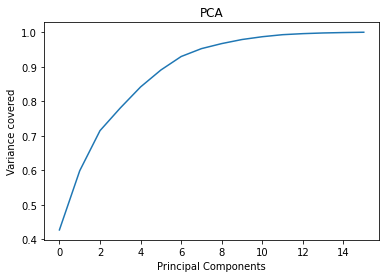

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Components")
plt.ylabel("Variance covered")
plt.title("PCA")
plt.show()

In [24]:
pca = PCA(n_components=11)
principal = pca.fit_transform(X_scaled)
principal_x = pd.DataFrame(principal,columns=['PC1','PC2',"PC3","PC4","PC5","PC6","PC7","PC8","PC9","PC10","PC11"])

In [27]:
principal_x.head(2)

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.668263  0.295117 -0.270193 -0.083201 -1.406738  0.258523 -0.354181   
1  2.276178  3.121667  1.018896 -1.947811 -0.106970 -2.788162 -1.297396   

        PC8       PC9      PC10      PC11  
0 -0.107793 -0.282929  0.109818  0.030201  
1 -0.280693 -0.347895 -0.221950  0.226372

#### Finding the best random state

In [35]:
max_accuracy = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(principal_x,y_over,test_size=0.25,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    y_pred = LR.predict(x_test)
    accu_score = accuracy_score(y_test,y_pred)
    if accu_score>max_accuracy:
        max_accuracy = accu_score
        max_rs = i
print("Maximum accuracy is",max_accuracy,"when",max_rs,"is the random state")

Maximum accuracy is 0.7558223210781106 when 126 is the random state


#### Splitting the dataset into train and test

In [25]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y_over,test_size=0.25,random_state = 126)

#### Model Building

In [35]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
lr_accuracy = accuracy_score(y_test,y_pred_lr)
print("Accuracy of Logistic Regression model is ",lr_accuracy)
print("Confusion Matrix","\n",confusion_matrix(y_test,y_pred_lr))
classification_rep = classification_report(y_test,y_pred_lr)
print("Classification report ; \n",classification_rep)

Accuracy of Logistic Regression model is  0.7544485149810284
Confusion Matrix 
 [[37000  8803]
 [13718 32195]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77     45803
           1       0.79      0.70      0.74     45913

    accuracy                           0.75     91716
   macro avg       0.76      0.75      0.75     91716
weighted avg       0.76      0.75      0.75     91716



#### Logistic regression works with an accuracy of 75.35%

In [36]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)
dt_accuracy = accuracy_score(y_test,y_pred_dt)
conf_mat = confusion_matrix(y_test,y_pred_dt)
classification_rep = classification_report(y_test,y_pred_dt)
print("Accuracy of Decision Tree classifier model is ",dt_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Decision Tree classifier model is  0.8538641022286187
Confusion Matrix 
 [[39737  6066]
 [ 7337 38576]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.84      0.87      0.86     45803
           1       0.86      0.84      0.85     45913

    accuracy                           0.85     91716
   macro avg       0.85      0.85      0.85     91716
weighted avg       0.85      0.85      0.85     91716



#### Decision tree works with an accuracy of 85.47%

In [27]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
rf_accuracy = accuracy_score(y_test,y_pred_rf)
conf_mat = confusion_matrix(y_test,y_pred_rf)
classification_rep = classification_report(y_test,y_pred_rf)
print("Accuracy of Random forest classifier model is ",rf_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

Accuracy of Random forest classifier model is  0.9003118321775917
Confusion Matrix 
 [[41253  4550]
 [ 4593 41320]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.90      0.90      0.90     45803
           1       0.90      0.90      0.90     45913

    accuracy                           0.90     91716
   macro avg       0.90      0.90      0.90     91716
weighted avg       0.90      0.90      0.90     91716



#### Random forest works with an accuracy of 90.03%

In [37]:
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred_xgbc = xgbc.predict(x_test)
xgbc_accuracy = accuracy_score(y_test,y_pred_xgbc)
conf_mat = confusion_matrix(y_test,y_pred_xgbc)
classification_rep = classification_report(y_test,y_pred_xgbc)
print("Accuracy of Xgboost model is ",xgbc_accuracy)
print("Confusion Matrix","\n",conf_mat)
print("Classification report ; \n",classification_rep)

[23:46:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of Xgboost model is  0.8425901696541498
Confusion Matrix 
 [[38718  7085]
 [ 7352 38561]]
Classification report ; 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84     45803
           1       0.84      0.84      0.84     45913

    accuracy                           0.84     91716
   macro avg       0.84      0.84      0.84     91716
weighted avg       0.84      0.84      0.84     91716



#### XGBoost works with an accuracy of 84.36%

#### Finding the cross-validation scores

In [39]:
cvs = cross_val_score(lr,principal_x,y_over,cv=5)
print("Cross validation score of Logistic Regression model is : ",cvs.mean())

Cross validation score of Logistic Regression model is :  0.7520157583939154


In [40]:
cvs = cross_val_score(dt,principal_x,y_over,cv=5)
print("Cross validation score of DecisionTreeClassifier is : ",cvs.mean())

Cross validation score of DecisionTreeClassifier is :  0.8575186923350879


In [43]:
cvs = cross_val_score(rf,principal_x,y_over,cv=5)
print("Cross validation score of RandomForestClassifier is : ",cvs.mean())

Cross validation score of RandomForestClassifier is :  0.8279598674441141


In [44]:
cvs = cross_val_score(xgbc,principal_x,y_over,cv=5)
print("Cross validation score of XGBoostClassifier is : ",cvs.mean())

[04:30:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:31:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:32:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [45]:
models = pd.DataFrame([["Logistic Regression","75.44","75.20","0.24"],["DecisionTreeClassifier","85.38","85.75","0.37"],["RandomForestClassifier","90.03","82.79","5.24"],["XGBoostClassifier","84.26","84.12","0.14"]],columns=["Model","Accuracy","Cross Validation Score","Difference"])
models

Model Accuracy Cross Validation Score Difference
0     Logistic Regression    75.44                  75.20       0.24
1  DecisionTreeClassifier    85.38                  85.75       0.37
2  RandomForestClassifier    90.03                  82.79       5.24
3       XGBoostClassifier    84.26                  84.12       0.14

#### XGBoostclassifier turns out to be the best model

#### Hyper Parameter Tuning

In [50]:
from sklearn.model_selection import RandomizedSearchCV
params = {'learning_rate':[0.05,0.2,0.1],
          'n_estimators':[10,100,5],
          'max_depth':[2,12,1],
          'max_leaf_nodes':[1,10,1]
         }
grid = RandomizedSearchCV(xgbc,params,cv=5,n_jobs=-1)
grid.fit(x_train,y_train)
best_params = grid.best_params_
print("Best Parameters are \n",best_params)

[08:50:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:50:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters are 
 {'n_estimators': 100, 'max_leaf_nodes': 10, 'max_depth': 12, 'learning_rate': 0.1}


In [51]:
model = XGBClassifier(learning_rate=0.1,max_depth=12,max_leaf_nodes=10,n_estimators=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy Score after hyperparameter tuning is ",accuracy_score(y_test,y_pred))

[08:53:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "max_leaf_nodes" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:53:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score after hyperparameter tuning is  0.872944742465873


#### After Hyper parameter tuning accuracy increased to 87.29%

#### Plotting ROC-AUC Curve

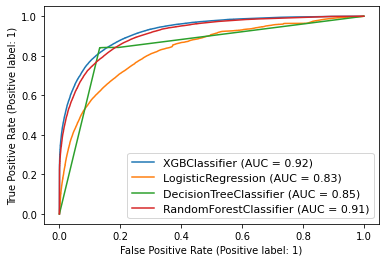

In [52]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve
disp = plot_roc_curve(xgbc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

#### saving the model

In [53]:
filename = 'micro_credit.pkl'
pickle.dump(xgbc,open(filename,'wb'))